In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import time

mushroom = pd.read_csv('mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information: (classes: edible=e, poisonous=p)

  *  cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

  *  cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

  *  cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

  *  bruises: bruises=t,no=f

  *  odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

  *  gill-attachment: attached=a,descending=d,free=f,notched=n

  * gill-spacing: close=c,crowded=w,distant=d

  *  gill-size: broad=b,narrow=n

  *  gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

  *  stalk-shape: enlarging=e,tapering=t

  *  stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

  *  stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

  *  stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

  *  stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

  *  stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

  *  veil-type: partial=p,universal=u

  *  veil-color: brown=n,orange=o,white=w,yellow=y

  *  ring-number: none=n,one=o,two=t

  *  ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

  *  spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

  *  population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

  *  habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [2]:
mushroom.shape

(8124, 23)

In [3]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Pretty even!!

In [4]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Data preprocessing

In [5]:
from sklearn import preprocessing as pp

mushroom_values = mushroom.values
le = pp.LabelEncoder()

le.fit(mushroom_values[:,0])
mushroom_encoded = le.transform(mushroom_values[:,0])

for i in range(1, mushroom.shape[1]):
    le.fit(mushroom_values[:,i])
    mushroom_encoded = np.vstack((mushroom_encoded,le.transform(mushroom_values[:,i])))
    

mushroom_encoded = mushroom_encoded.T
mushroom_encoded.shape

(8124, 23)

In [6]:
list(mushroom.columns.values)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

#### En easier way

In [7]:
for col in mushroom.columns:
    mushroom[col] = le.fit_transform(mushroom[col])

In [8]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Train test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mushroom_encoded[:,1:], mushroom_encoded[:,0], test_size=0.2, random_state=42)

### Decision tree classifier implementation

In [10]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(random_state = 42)

start_dtc = time.time()
dtc.fit(X_train, y_train)
end_dtc = time.time()

print('Time to train decision tree classifier: %0.4fs' % (end_dtc - start_dtc))

Time to train decision tree classifier: 0.0065s


In [11]:
dtc.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.02777269,  0.03746317,
        0.        ,  0.        ,  0.11671717,  0.33692629,  0.02322861,
        0.00970566,  0.        ,  0.00189668,  0.        ,  0.01835419,
        0.        ,  0.00400568,  0.00265157,  0.        ,  0.21302621,
        0.18064443,  0.02760765])

In [12]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, mushroom_encoded[:,1:], mushroom_encoded[:,0], cv=10)

array([ 0.68511685,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.98520345,  1.        ])

In [13]:
dtc.score(X_test, y_test)

1.0

In [14]:
y_prob = dtc.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


Computing the area under the ROC-curve,

In [16]:
from sklearn import metrics

auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

Compute Area Under the Curve (AUC)

In [17]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

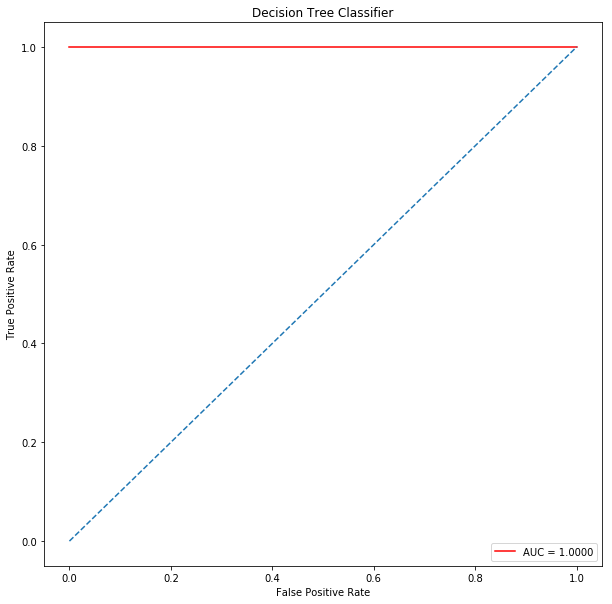

In [18]:
plt.figure(figsize=(10,10))
plt.title('Decision Tree Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Random forest classifier implementation

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)

start_rfc = time.time()
rfc.fit(X_train, y_train)
end_rfc = time.time()

print('Time to train random forest classifier: %0.4fs' % (end_rfc - start_rfc))

Time to train random forest classifier: 0.1672s


In [20]:
cross_val_score(rfc, mushroom_encoded[:, 1:], mushroom_encoded[:,0], cv=10)

array([ 0.68511685,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.98890259,  1.        ])

In [21]:
rfc.score(X_test, y_test)

1.0

In [22]:
y_prob = rfc.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


In [23]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [24]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

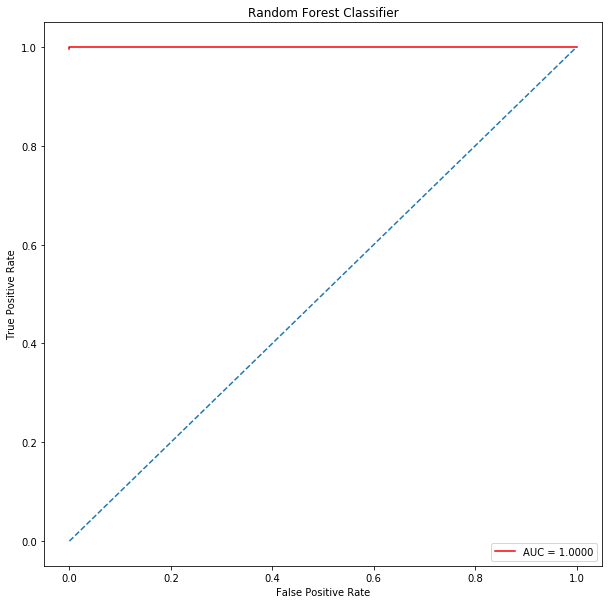

In [25]:
plt.figure(figsize=(10,10))
plt.title('Random Forest Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Logistic regression implementation

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()

print('Time to train logistic regression classifier: %0.4fs' % (end_lr - start_lr))

Time to train logistic regression classifier: 0.0586s


In [27]:
cross_val_score(lr, mushroom_encoded[:, 1:], mushroom_encoded[:,0], cv=10)

array([ 0.6703567 ,  0.85854859,  0.98154982,  0.98523985,  0.89544895,
        0.86100861,  0.99876847,  0.99630542,  0.62762022,  0.93958076])

In [28]:
lr.score(X_test, y_test)

0.94646153846153847

In [29]:
y_prob = lr.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[798  45]
 [ 42 740]]


In [31]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.94645538859207612

In [32]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.98016765115453564

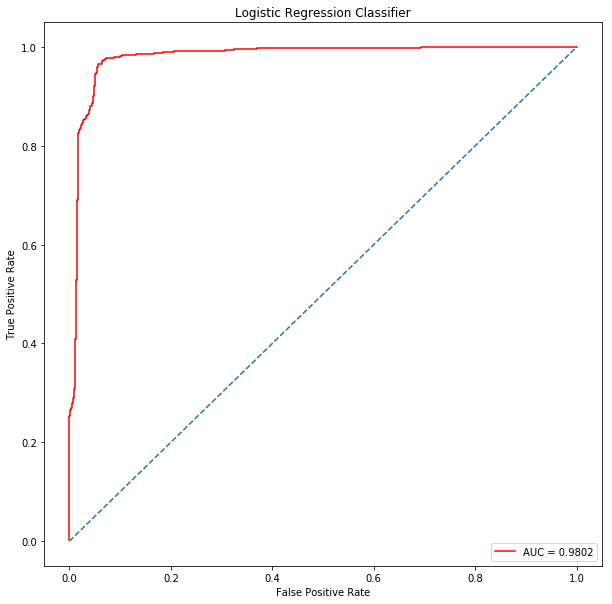

In [33]:
plt.figure(figsize=(10,10))
plt.title('Logistic Regression Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Logistic Regression Implementation after GridSearchCV

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [35]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1','l2']}

lr = LogisticRegression()

lr_gs = GridSearchCV(lr, tuned_parameters,cv=10)

start_lr_gs = time.time()
lr_gs.fit(X_train, y_train)
end_lr_gs = time.time()

print('Time to train logistic regression with GridSearchCV classifier: %0.4fs' % (end_lr_gs - start_lr_gs))

Time to train logistic regression with GridSearchCV classifier: 172.0496s


In [36]:
y_prob = lr_gs.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[810  33]
 [ 21 761]]


In [37]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.96699993628892067

In [38]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.98943002854863127

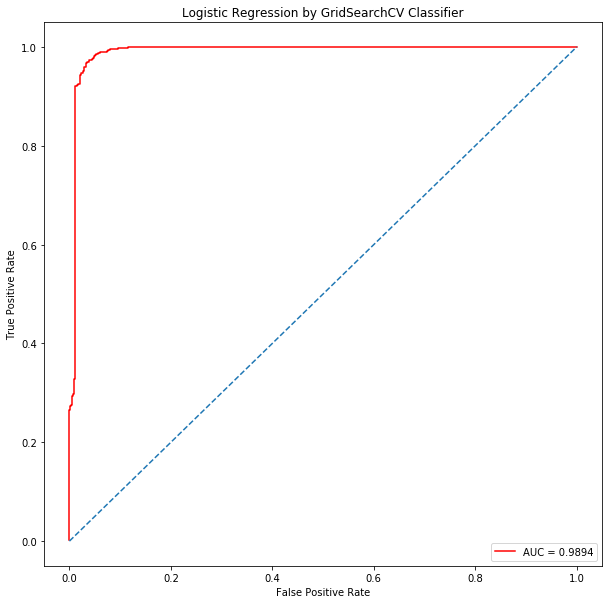

In [39]:
plt.figure(figsize=(10,10))
plt.title('Logistic Regression by GridSearchCV Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Gaussian Naive Bayes implementation

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

start_gnb = time.time()
gnb.fit(X_train, y_train)
end_gnb = time.time()

print('Time to train Gaussian naive bayes classifier: %0.4fs' % (end_gnb - start_gnb))

Time to train Gaussian naive bayes classifier: 0.0039s


In [41]:
cross_val_score(gnb, mushroom_encoded[:, 1:], mushroom_encoded[:,0], cv=10)

array([ 0.59778598,  0.78843788,  0.97908979,  0.9803198 ,  0.84870849,
        0.81303813,  0.81034483,  0.81650246,  0.85326757,  0.97533909])

In [42]:
gnb.score(X_test, y_test)

0.92184615384615387

In [43]:
y_prob = gnb.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[771  72]
 [ 55 727]]


In [44]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.92212913325627333

In [45]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.95448146766055952

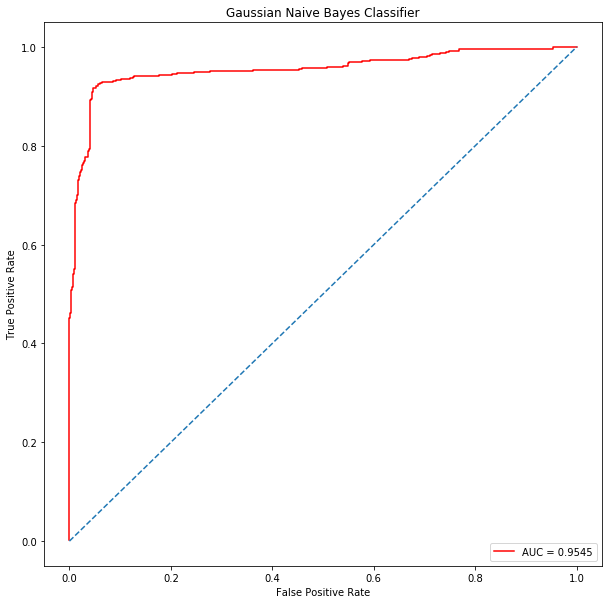

In [46]:
plt.figure(figsize=(10,10))
plt.title('Gaussian Naive Bayes Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Support Vector Machine implementation

In [52]:
from sklearn.svm import SVC

svc = SVC(probability=True)

start_svc = time.time()
svc.fit(X_train, y_train)
end_svc = time.time()

print('Time to train default SVM classifier: %0.4fs' % (end_svc - start_svc))

Time to train default SVM classifier: 2.0856s


In [53]:
cross_val_score(svc, mushroom_encoded[:, 1:], mushroom_encoded[:,0], cv=10)

array([ 0.68511685,  1.        ,  1.        ,  1.        ,  0.99876999,
        1.        ,  1.        ,  1.        ,  0.81011097,  1.        ])

In [54]:
svc.score(X_test, y_test)

1.0

In [55]:
y_prob = svc.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


In [56]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

In [57]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

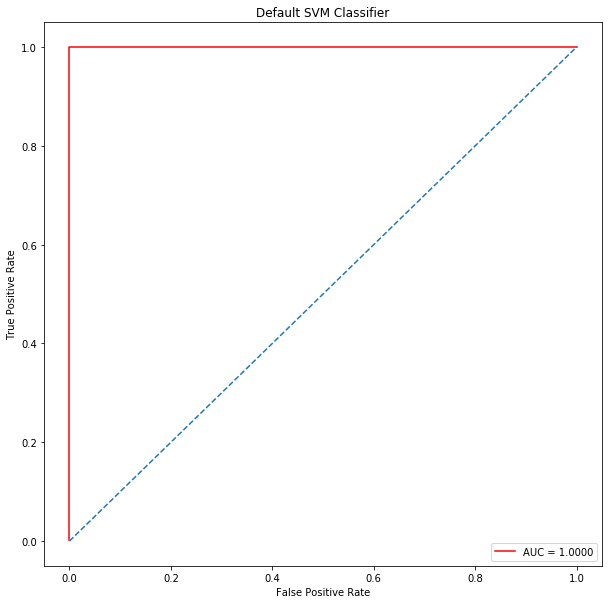

In [59]:
plt.figure(figsize=(10,10))
plt.title('Default SVM Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Linear SVC

In [60]:
svc_linear = SVC(probability=True, kernel = 'linear')

start_svc_l = time.time()
svc_linear.fit(X_train, y_train)
end_svc_l = time.time()

print('Time to train linear SVM classifier: %0.4fs' % (end_svc_l - start_svc_l))

Time to train linear SVM classifier: 9.1778s


In [72]:
cross_val_score(svc_linear, mushroom_encoded[:, 1:], mushroom_encoded[:,0], cv=10)

array([ 0.66297663,  0.86715867,  0.99630996,  0.99753998,  0.89790898,
        0.86223862,  0.99876847,  0.99630542,  0.62638718,  0.95807645])

In [67]:
svc_linear.score(X_test, y_test)

0.97292307692307689

In [68]:
y_prob = svc_linear.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[829  14]
 [ 30 752]]


In [69]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.97251473697942747

In [70]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.98043311398518884

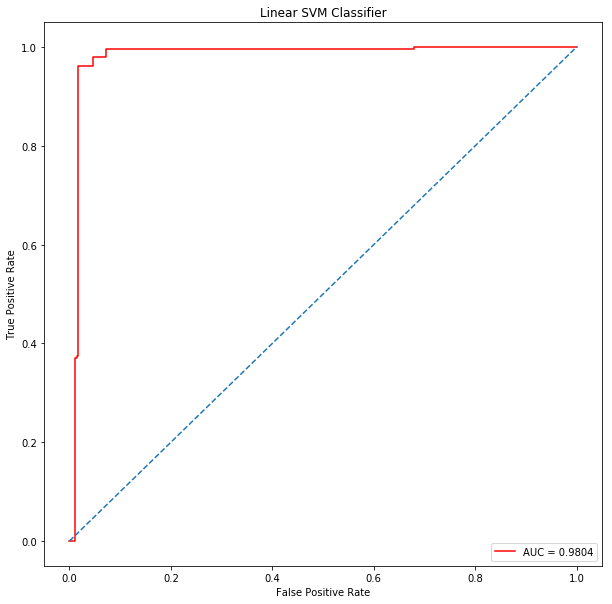

In [71]:
plt.figure(figsize=(10,10))
plt.title('Linear SVM Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Polynomial SVC

In [74]:
svc_poly = SVC(probability=True, kernel = 'poly')

start_svc_p = time.time()
svc_poly.fit(X_train, y_train)
end_svc_p = time.time()

print('Time to train polynomial SVM classifier: %0.4fs' % (end_svc_p - start_svc_p))

Time to train polynomial SVM classifier: 0.9972s


In [75]:
svc_poly.score(X_test, y_test)

1.0

In [76]:
y_prob = svc_poly.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


In [77]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

In [78]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

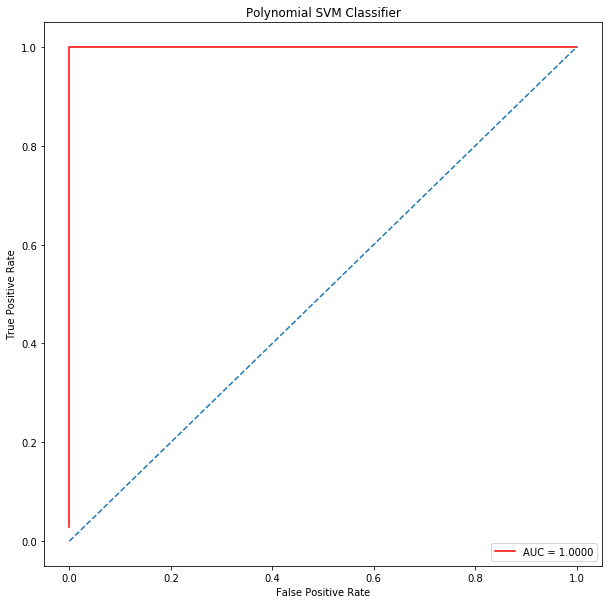

In [79]:
plt.figure(figsize=(10,10))
plt.title('Polynomial SVM Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Neural Network implementation

In [80]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()

start_mlpc = time.time()
mlpc.fit(X_train, y_train)
end_mlpc = time.time()

print('Time to train Multi-Layer Perceptron classifier: %0.4fs' % (end_mlpc - start_mlpc))

Time to train Multi-Layer Perceptron classifier: 1.7096s


In [81]:
mlpc.score(X_test, y_test)

1.0

In [82]:
y_prob = mlpc.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


In [83]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

In [84]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

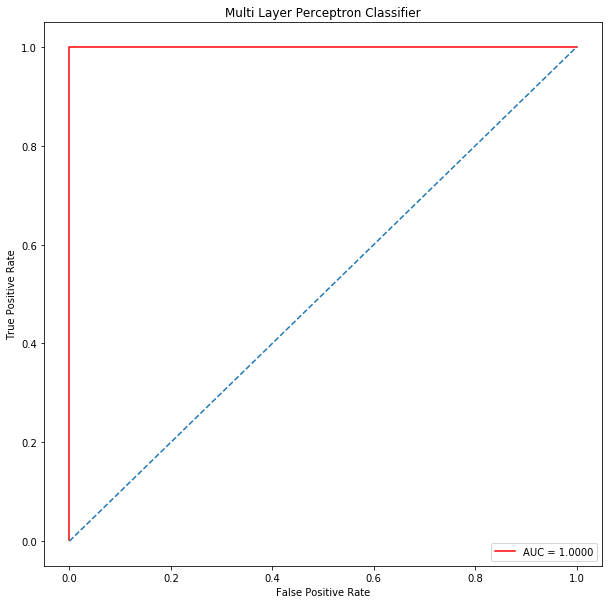

In [85]:
plt.figure(figsize=(10,10))
plt.title('Multi Layer Perceptron Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')